In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

df = pd.read_csv('telco-churn.csv')
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


La información esta segmetada en, 
*  **Demográfico: **
*     gender = Género Masculino Femenino 
*     Rango de edad: pareja (Partner), dependiente(Dependents) y jubilado (SeniorCitizen) 

*  **Servicios: **
*    Servicio telefónico(PhoneService): 
*        - multilínea (MultipleLines)
*    Servicio de Internet(InternetService): 
*        - servicios relacionados 
*        - seguridad en línea(OnlineSecurity), 
*        - respaldo en línea(OnlineBackup)
*        - protección del dispositivo(DeviceProtection)
*        - soporte técnico(TechSupport)
*        - transmisión de TV (StreamingTV)
*        - transmisión de películas(StreamingMovies)
*  **Tipo de cuenta: **
*    Tenencia(tenure) - ¿Cuánto tiempo está el cliente en la empresa? 
*    Tipo de contrato(Contract): ¿Qué tipo de contrato tienen con una empresa? 
*      - Un Año(One year), Mensual(Month-to-month), contrato de dos años(Two year contract)
*    Facturación electrónica(PaperlessBilling): ¿el cliente es sin papel o no? 
*    Método de pago: ¿qué tipo de método de pago tiene el cliente? 
*      - Cheque enviado por correo(Mailed check), Cheque electrónico(Electronic check), Tarjeta de crédito (Automático) (Credit *        card (automatic)), Transferencia bancaria (Automático) (Bank transfer (automatic)) 
*  **Gasto:** Cargos mensuales(Monthly charges), Cargos totales(Total charges) 
*  
*  **Objetivo:** Rotación(Churn): ¿el cliente dejó la empresa o sigue en la empresa?
        
*  Identificar patrones que pueden generar pérdidas de clientes.

In [3]:
#Cantidad y nombre de columnas
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)
print('Filas: ', df.shape[0], 'column: ', df.shape[1])
print('Valores extraños: ' , df.isna().sum().values.sum())

Cantidad de Filas y columnas: (7043, 21)
Nombre columnas: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Filas:  7043 column:  21
Valores extraños:  0


#No hay valores nulos

In [4]:
# Columnas, nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Hay que evaluar por que el datos TotalCharges sale como "object", si evidentemente es un monto.
print(pd.value_counts(df['TotalCharges'], sort = True))

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
1362.85     1
1495.1      1
3062.45     1
301.9       1
7795.95     1
Name: TotalCharges, Length: 6531, dtype: int64


In [6]:
# #Se evidencia 11 campos en blanco. Total Cargos tiene datos en blanco Se remplazaran con 0
df.TotalCharges.replace({" ": "0"},inplace=True) #Replazar 11 valores con espacios por 0
df.TotalCharges=df.TotalCharges.astype('float64') #Cambiar el tipo object a float

In [7]:
#Descripción estadística de los datos numéricos
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df0 = df
df0 = df0.drop(columns = ['customerID'])

# EDA

Churn
No     0.73463
Yes    0.26537
dtype: float64


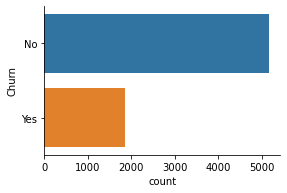

In [9]:
# Balance de la variable de salida
#print(df.shape)
#print(pd.value_counts(df['Churn'], sort = True))
print(df.groupby('Churn').size() / len(df))
sb.catplot(data=df,y='Churn', kind = 'count',height=2.6, aspect=1.5)

#Hay un desbalance en la variable de salida. Hay que resolver el inconveniente.
* Tambien se nota que la tasa de rotación de la empresa es de alrededor del 26%

La permanencia (en meses) está representada por la variable Tenure y el abandono de clientes por la variable Churn, que es la variable objetivo. El gráfico de barras a continuación puede proporcionar una buena idea de cómo se distribuye la rotación a lo largo de la permanencia del cliente.

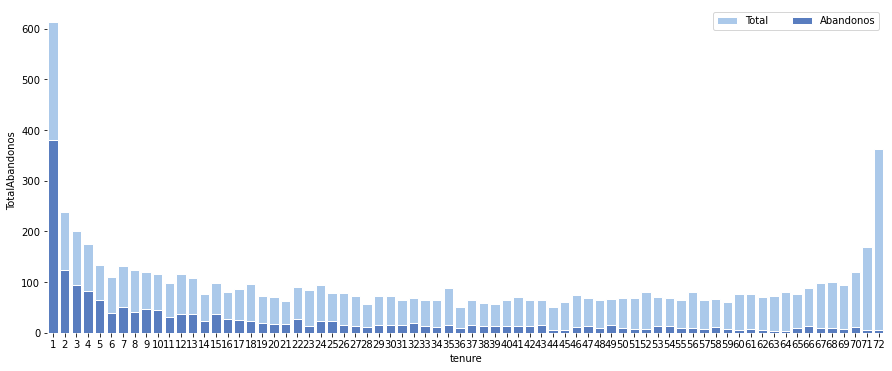

In [10]:
result11 = df.groupby(["tenure", "Churn"])["Churn"].count().reset_index(name="TotalAbandonos")
result11 = result11[result11.Churn == 'Yes']
result12 = df.groupby(["tenure"])["tenure"].count().reset_index(name="TotalClientes")

result13 = pd.merge(result11,result12,left_on='tenure', right_on='tenure')

f, ax = plt.subplots(figsize = (15,6))
sb.set_color_codes('pastel')
sb.barplot(y = 'TotalClientes', x = 'tenure', data = result13, label = 'Total ', color = 'b', edgecolor = 'w')
sb.set_color_codes('muted')
sb.barplot(y = 'TotalAbandonos', x = 'tenure', data = result13, label = 'Abandonos', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sb.despine(left = True, bottom = True)
plt.show()


Se aprecia que la gran mayoría de clientes no renuevan su suscripción en el primer mes, representando la mayoria de los clientes que se van. Las razones podrían ser malas experiencias, períodos de prueba o cuentas con prepago que se inactivan si no se realiza una recarga en un período predefinido.

<AxesSubplot:xlabel='TotalCharges'>

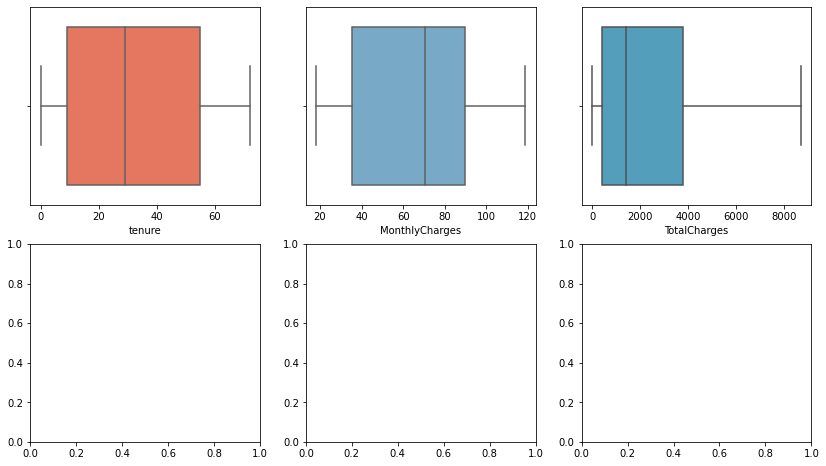

In [11]:
fig, axes = plt.subplots(2,3, figsize=(14,8))
sb.boxplot(x= "tenure", data=df,  orient='h' , ax=axes[0][0],  palette="Reds")
sb.boxplot(x= "MonthlyCharges", data=df,  orient='h' , ax=axes[0][1],  palette="Blues")
sb.boxplot(x= "TotalCharges", data=df,  orient='h' , ax=axes[0][2],  palette="GnBu_d")

In [12]:
# NO existen valores anómalos

### Distribución de variables categóricas y binarias por objetivo (Churn vrs No Churn)

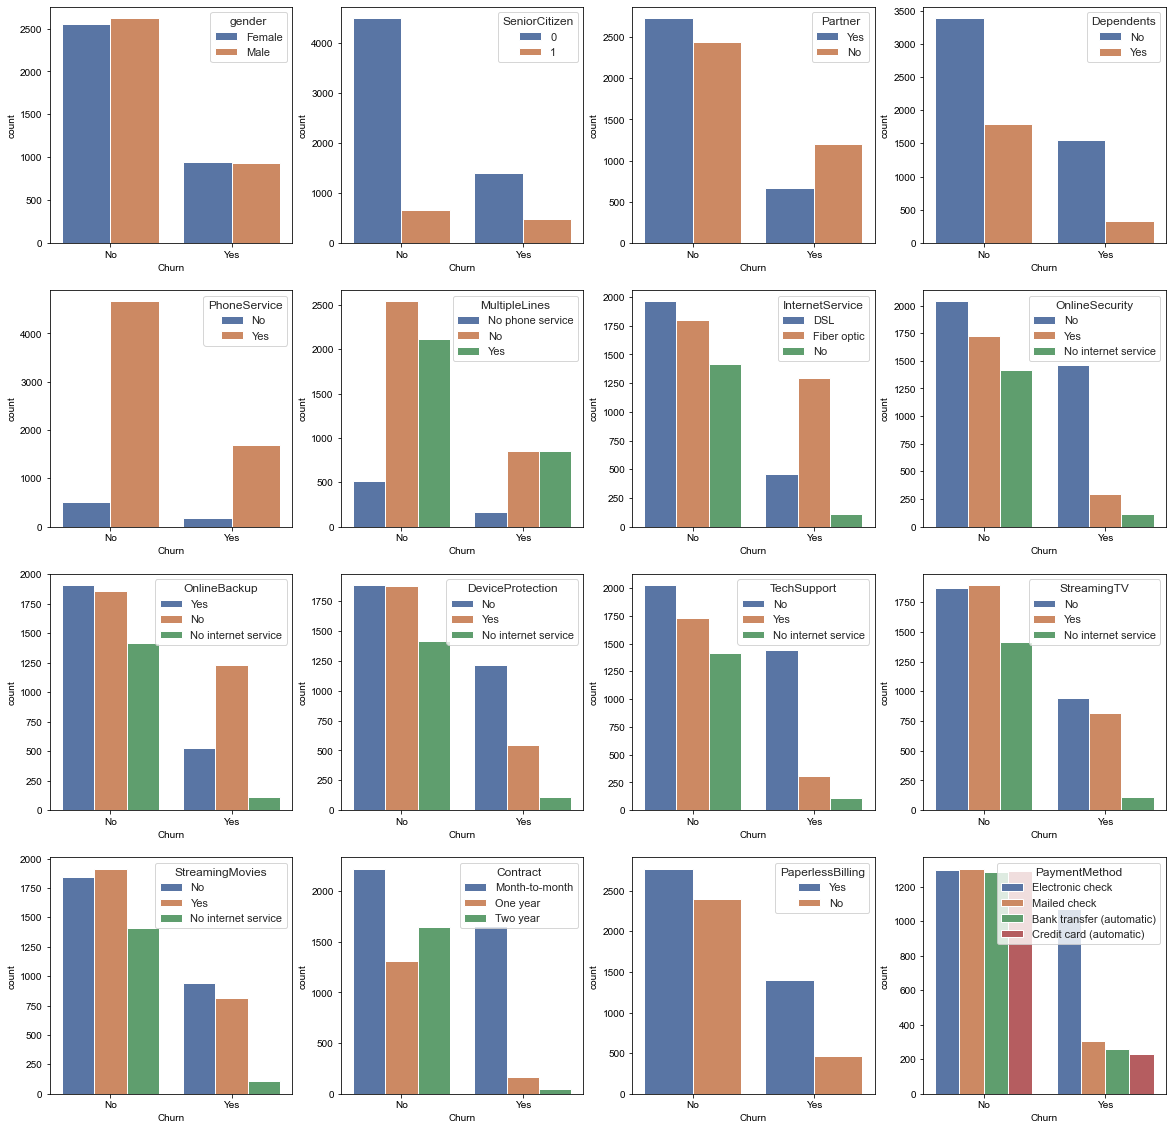

In [13]:
# Visualizar el comportamiento de las variables categoricas
variables_categoricas=['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling','PaymentMethod']

fig , ax = plt.subplots(4,4,figsize=(20,20))
sb.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,variables_categoricas):
    sb.countplot(x=df["Churn"],hue=df[col],ax=axis)

### De los graficos de arriba se puede deducir que los clientes que van a rotar
* No tienen pareja ni dependientes; lo que implica que probablemente sea soltero. 
* Cuentan con servicio de Internet y específicamente fibra óptica 
* No tienen seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico 
* Tener servicios de transmisión de TV y películas en tiempo real 
* Estan con plan mensual 
* Tienen facturación electrónica 
* Tiene método de pago con cheque electrónico
* Los clientes sin dependientes tienen cuatro veces más probabilidades de abandonar 
* Las personas mayores tienen tres veces menos probabilidades de abandonar 

### Distribución de Tenure, Monthly Charges y Total Charges

In [14]:
# Media de clientes para la tiempo de permanencia, y los cargos mensuales y totales (Churn vs No churn)   
variables_numericas = ['tenure','MonthlyCharges', 'TotalCharges']
churn_summary = df.groupby('Churn')
print(churn_summary[variables_numericas].mean())

          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2549.911442
Yes    17.979133       74.441332   1531.796094


El resultado muestra que los clientes que abandonaron(Churn=Yes) tenían más cargos mensuales en comparación con los clientes existentes. Además, existe una diferencia drástica en la permanencia(tenure) y los cargos totales de los que se fueron frente a los clientes existentes, pero eso es facíl de entender, dado que los clientes que se van no pagan más. 
* Revisemos la distribución de cada característica con la variable de destino.

In [15]:
def Distribucion_Numerica(df_cal,feature):
    """ Distribution de la variable numerica basado en la fuente"""
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    ax = sb.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Distribución original " +feature 
    plt.title(title_str)
    
    plt.subplot(1,2,2)
    ax = sb.kdeplot(df_cal.loc[(df_cal['Churn']=="Yes"),feature]
                     , color = 'g'
                     , shade = True
                     , label='Churn', legend = True)
    ax = sb.kdeplot(df_cal.loc[(df_cal['Churn']=="No"),feature]
                     , color = 'b'
                     , shade = True
                     , label='NO Churn', legend = True)
    
    title_str = feature + " Distribución: Se van(Churn) vs Se quedan(No churn)"
    plt.title(title_str)
    plt.legend()
    plt.show()

### Distribución Tenure vs Churn 

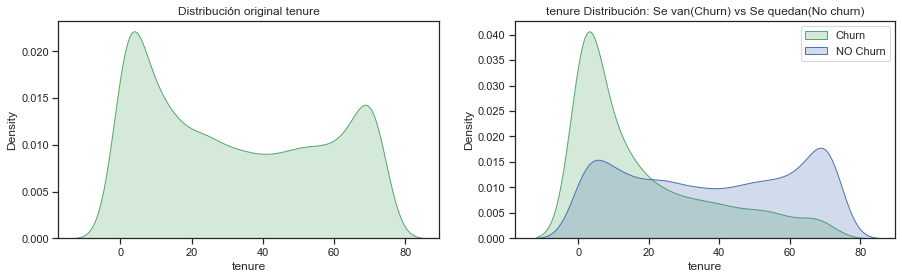

In [16]:
Distribucion_Numerica(df,'tenure')

### Distribución MonthlyCharges vs Churn 

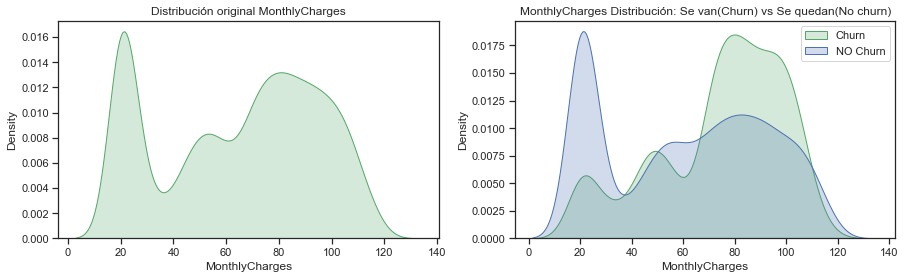

In [17]:
Distribucion_Numerica(df,'MonthlyCharges')

De las distribuciones se puede deducir, 
* los suscriptores tienen más probabilidades de dejar la empresa si el contrato es inferior a un año y 
* más probabilidades de tener cargos mensuales de más de $ 65

# Analisis mas detallado de variables categoricas

In [18]:
df00 = df0[df0.InternetService != 'No']
df00 = df00.replace({'Yes':1,'No':0})
df00.groupby('InternetService')['MonthlyCharges'].max()

InternetService
DSL             94.80
Fiber optic    118.75
Name: MonthlyCharges, dtype: float64

<Figure size 720x288 with 0 Axes>

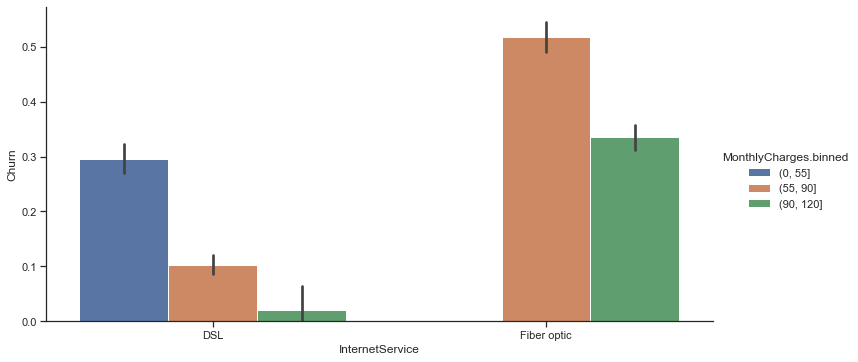

In [19]:
df00['MonthlyCharges.binned'] = pd.cut(df00['MonthlyCharges'],bins=[0,55,90,120])
fig = plt.figure(figsize=(10,4))
ax = sb.catplot(data=df00,hue='MonthlyCharges.binned',x='InternetService', y='Churn',
           kind='bar', aspect=2)
plt.show()

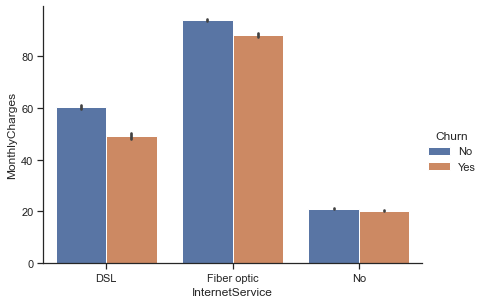

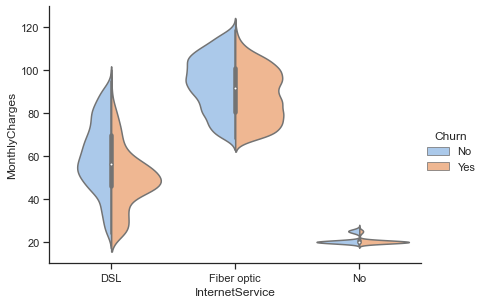

In [20]:
ax = sb.catplot(data = df0, x="InternetService", y="MonthlyCharges", hue="Churn", kind="bar",
                  height=4.2, aspect=1.4);

ax = sb.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df0, height=4.2, aspect=1.4);


Caracteristicas categóricas: servicio de Internet 
* Es interesante cómo los clientes con DSL (conexión más lenta) y cargos más altos tienen menos probabilidades de abandonar.
* Los clientes sin Internet tienen una tasa de abandono muy baja 
* Los clientes con fibra son más propensos a abandonar que aquellos con conexión DSL

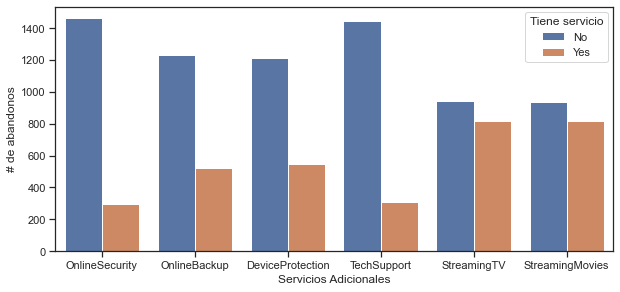

In [21]:
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
plt.figure(figsize=(10, 4.5))
df1 = df0[(df0.InternetService != 'No') & (df0.Churn == 'Yes')]
df1 = pd.melt(df1[cols]).rename({'value': 'Tiene servicio'}, axis=1)
ax = sb.countplot(data=df1, x='variable', hue='Tiene servicio', hue_order=['No', 'Yes'])
ax.set(xlabel='Servicios Adicionales', ylabel='# de abandonos')
plt.show()

## Otros analisis a caracteristicas categóricas: 
* Seis servicios adicionales 
* Los clientes con los primeros 4 adicionales (OnlineSeguridad a TechSupport) son menos propensos a irse. 
* Los servicios de Streaming no determinan la ida del cliente.

# La mayoria de variables son categoricas. Se mapearan a númericas.

In [22]:
# Mapeo de variables Categoricas
df['gender_code'] = df['gender'].map({'Female': 1,'Male': 2}).astype(int)
df['Partner_code'] = df['Partner'].map({'Yes': 1,'No': 2}).astype(int)
df['Dependents_code'] = df['Dependents'].map({'Yes': 1,'No': 2}).astype(int)
df['PhoneService_code'] = df['PhoneService'].map({'Yes': 1,'No': 2}).astype(int)
df['MultipleLines_code'] = df['MultipleLines'].map({'Yes': 1,'No': 2, 'No phone service': 3}).astype(int)
df['InternetService_code'] = df['InternetService'].map({'DSL': 1,'Fiber optic': 2, 'No': 3}).astype(int)
df['OnlineSecurity_code'] = df['OnlineSecurity'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['OnlineBackup_code'] = df['OnlineBackup'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['DeviceProtection_code'] = df['DeviceProtection'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['TechSupport_code'] = df['TechSupport'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['StreamingTV_code'] = df['StreamingTV'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['StreamingMovies_code'] = df['StreamingMovies'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['Contract_code'] = df['Contract'].map({'Month-to-month': 1,'One year': 2, 'Two year': 3}).astype(int)
df['PaperlessBilling_code'] = df['PaperlessBilling'].map({'Yes': 1,'No': 2}).astype(int)
df['Churn_code'] = df['Churn'].map({'Yes': 1,'No': 2}).astype(int)
df['PaymentMethod_code'] = df['PaymentMethod'].map({'Bank transfer (automatic)': 1,'Credit card (automatic)': 2, 
                                                    'Electronic check': 3,'Mailed check': 4}).astype(int)
df_mapeado = df

In [23]:
#Obtenemos un nuevo conjunto de datos para revisar correlaciones y distribuciones y se eliminan las anteriores.
ElementosABorrar = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','Contract',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract_code','PaymentMethod',
                    'PaperlessBilling','Churn']
df_mapeado = df_mapeado.drop(ElementosABorrar, axis = 1)

In [24]:
df_mapeado.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
gender_code,1.00,2.00,2.00,2.00,1.00
Partner_code,1.00,2.00,2.00,2.00,2.00
Dependents_code,2.00,2.00,2.00,2.00,2.00
PhoneService_code,2.00,1.00,1.00,2.00,1.00
MultipleLines_code,3.00,2.00,2.00,3.00,2.00
InternetService_code,1.00,1.00,1.00,1.00,2.00


In [25]:
# Obtener las correlaciones de las variables con "Churn" con las actuales
df_mapeado.corr()['Churn_code'].sort_values(ascending = False)

Churn_code               1.000000
tenure                   0.352229
TotalCharges             0.198324
PaperlessBilling_code    0.191825
StreamingTV_code         0.164673
StreamingMovies_code     0.163220
DeviceProtection_code    0.084654
OnlineBackup_code        0.074205
InternetService_code     0.047291
MultipleLines_code       0.036310
TechSupport_code         0.027037
OnlineSecurity_code      0.023309
PhoneService_code        0.011942
gender_code              0.008612
PaymentMethod_code      -0.107062
Partner_code            -0.150448
SeniorCitizen           -0.150889
Dependents_code         -0.164221
MonthlyCharges          -0.193356
Name: Churn_code, dtype: float64

In [26]:
correlated_features = set()
df_corr = df_mapeado
correlation_matrix = df_corr.corr()

In [27]:
# Se obtendran las caracteristicas que tengan un correlación mayor a .7.
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [28]:
correlated_features

{'DeviceProtection_code',
 'InternetService_code',
 'MonthlyCharges',
 'OnlineBackup_code',
 'OnlineSecurity_code',
 'StreamingMovies_code',
 'StreamingTV_code',
 'TechSupport_code',
 'TotalCharges',
 'tenure'}

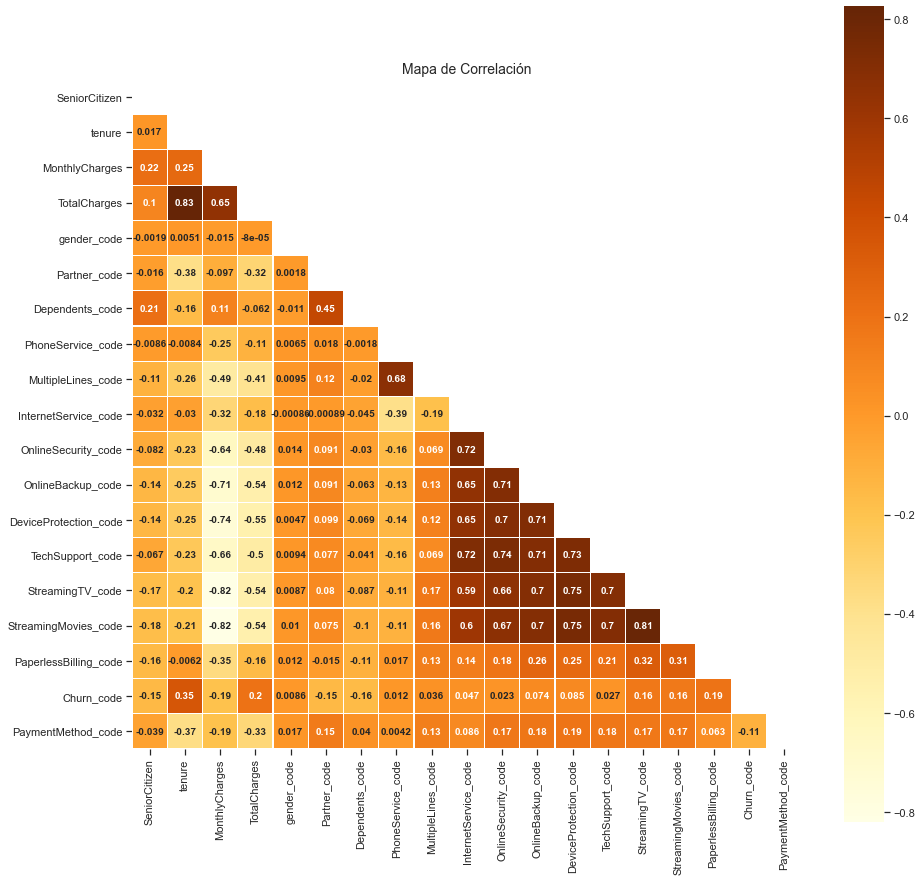

In [29]:
def Generar_Mapa_Correlacion(corr, chart_title, mask_uppertri=False ):
    """ Basado en las caracteristicas correlacionaas , genera matrix de correlacion """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(15,15))
    sb.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(df_cal.corr(),2)

Generar_Mapa_Correlacion(correlation_matrix
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

In [30]:
import scipy.stats as ss
n=6
r=correlation_matrix
t=r*np.sqrt((n-2)/(1-r*r))
p_features = set()  
arr_matrix = ss.t.cdf(t, n-2)
p_matrix = pd.DataFrame(arr_matrix)

In [31]:
for i in range(len(p_matrix.columns)):  
    for j in range(i):
        if abs(p_matrix.iloc[i, j]) <= 0.05:
            colname = p_matrix.columns[i]
            colname2 = p_matrix.columns[j]
            p_features.add(colname)
            p_features.add(colname2)

In [32]:
# Rechazan la hipotesis nula. Se podrían eliminar
p_features

{2, 12, 14, 15}

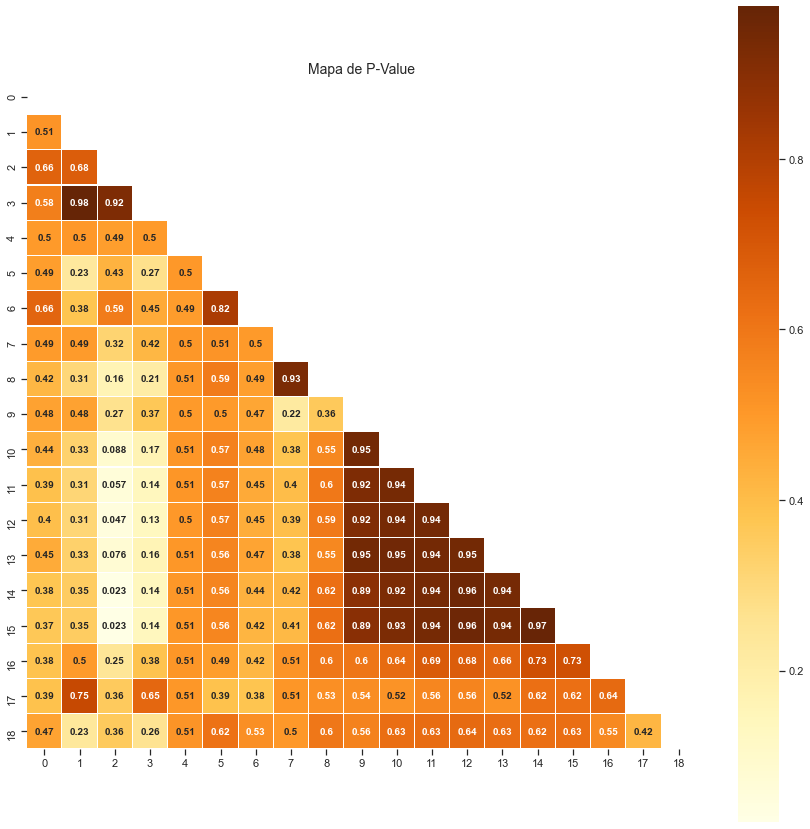

In [33]:
Generar_Mapa_Correlacion(p_matrix
                       ,chart_title = 'Mapa de P-Value'
                       ,mask_uppertri = True)

### Bajo este analisis del p-value y el mapa del P-value se puede observar que las caracteristicas involucradas son:
* 12-DeviceProtection con 2-MonthlyCharges)
* 14-StreamingTV con 2-MonthlyCharges)
* 15-StreamingMovie con 2-MonthlyCharges)

Se tendrá que verificar si la dispersón entre ellos lo demuestra

In [34]:
# Escalado de las variables numerales ordinales
import sklearn.preprocessing as prepro

def Normalizar(feature):
    """ Retorna caracteristicas normalizadas """
    return prepro.StandardScaler().fit_transform(feature)
# normalized tenure and monthlycharges
df_mapeado['tenure_norm'] = Normalizar(df_mapeado[['tenure']])
df_mapeado['MonthlyCharges_norm'] = Normalizar(df_mapeado[['MonthlyCharges']])
df_mapeado['TotalCharges_norm'] = Normalizar(df_mapeado[['TotalCharges']])

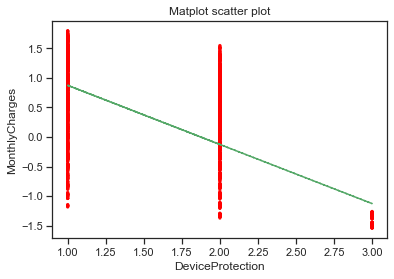

In [35]:
plt.scatter(df_mapeado.DeviceProtection_code, df_mapeado.MonthlyCharges_norm, alpha=0.8, c="red", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_mapeado.DeviceProtection_code, df_mapeado.MonthlyCharges_norm, 1)
p = np.poly1d(z)
plt.plot(df_mapeado.DeviceProtection_code,p(df_mapeado.DeviceProtection_code),"g--")

plt.title('Matplot scatter plot')
plt.xlabel('DeviceProtection')
plt.ylabel('MonthlyCharges')
#plt.legend(loc=2)
plt.show()

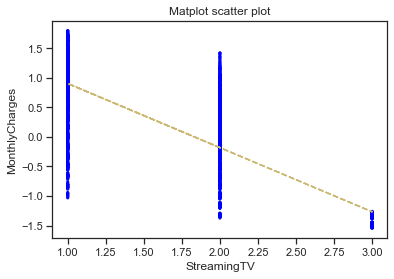

In [36]:
plt.scatter(df_mapeado.StreamingTV_code, df_mapeado.MonthlyCharges_norm, alpha=0.8, c="blue", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_mapeado.StreamingTV_code, df_mapeado.MonthlyCharges_norm, 1)
p = np.poly1d(z)
plt.plot(df_mapeado.StreamingTV_code,p(df_mapeado.StreamingTV_code),"y--")

plt.title('Matplot scatter plot')
plt.xlabel('StreamingTV')
plt.ylabel('MonthlyCharges')
#plt.legend(loc=2)
plt.show()

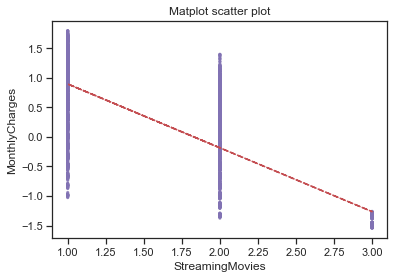

In [37]:
plt.scatter(df_mapeado.StreamingMovies_code, df_mapeado.MonthlyCharges_norm, alpha=0.8, c="m", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_mapeado.StreamingMovies_code, df_mapeado.MonthlyCharges_norm, 1)
p = np.poly1d(z)
plt.plot(df_mapeado.StreamingMovies_code,p(df_mapeado.StreamingMovies_code),"r--")

plt.title('Matplot scatter plot')
plt.xlabel('StreamingMovies')
plt.ylabel('MonthlyCharges')
#plt.legend(loc=2)
plt.show()

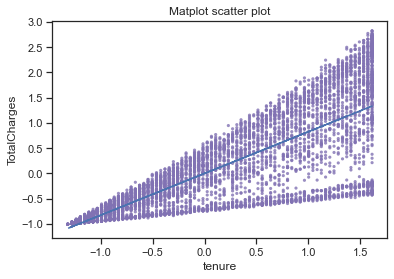

In [38]:
plt.scatter(df_mapeado.tenure_norm, df_mapeado.TotalCharges_norm, alpha=0.8, c="m", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_mapeado.tenure_norm, df_mapeado.TotalCharges_norm, 1)
p = np.poly1d(z)
plt.plot(df_mapeado.tenure_norm,p(df_mapeado.tenure_norm),"b--")

plt.title('Matplot scatter plot')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
#plt.legend(loc=2)
plt.show()

#De la matriz de correlación, características como la tenure, MontlhyCharges y TotalCharges están altamente correlacionados con servicios como MultipleLines, *Internet services* , OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies.

Se logra apreciar de los gráficos de dispersión anterior que las caracteristicas tienen comportamientos identicos, por lo que se pueden descartar.

Sin embargo del mapa p_value, podemos ver que se rechaza la hipotesis nula para algunas caracteristicas, las cuales son las menores a 5%.

### Comprensión de datos 1 
* Correlación con la Churn 
* El "contrato mensual, la falta de OnlineSegurity y TechSupport parecen tener una correlación positiva con "Churn". * La permanencia(tenure), los contratos de dos años y servicios como  OnlineSegurity, TechSupport, BackupOnline y DeviceProtection  parecen estar correlacionados negativamente con "Churn". 
* 'Gender', 'StreamingMovies', 'StreamingTV' parecen no tener ninguna diferencia

# Analisis de clusters

* Revisemos si existe alguna relación entre la tenencia(tenure) y los cargos mensuales.

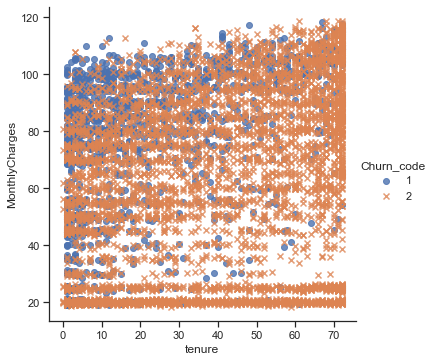

In [39]:
sb.lmplot(x='tenure'
           ,y='MonthlyCharges'
           ,data=df_mapeado
           ,hue='Churn_code'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

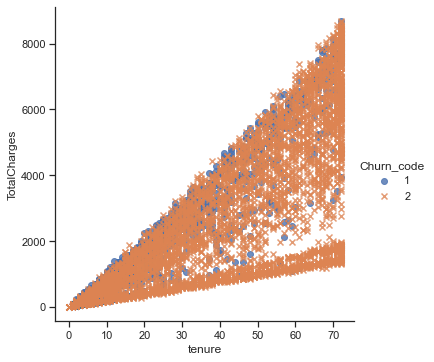

In [40]:
sb.lmplot(x='tenure'
           ,y='TotalCharges'
           ,data=df_mapeado
           ,hue='Churn_code'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

* A partir del gráfico, se puede apreciar que hay algunos grupos basados en las caracteristicas empleadas.

* Revisemos con el algoritmo de clúster K-means para ver los clústeres. 
**Antes de pasar datos al algoritmo K-means, es necesario normalizar los valores de tenure y MonthlyCharges.**
* Existe una tendencia muy marcada entre tenure y totalCharges*

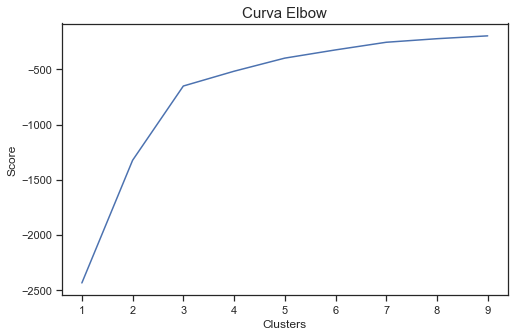

In [41]:
def Crea_curva_elbow(data):
    """ Dsepliega curva elbow de K-means para la información data """
    from sklearn.cluster import KMeans
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(8,5))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Curva Elbow",fontsize=15)
    plt.show()
    
# Chequeando el número de clusters

Crea_curva_elbow(df_mapeado[df_mapeado.Churn_code==1][['tenure_norm','MonthlyCharges_norm']])

    * Parece que 3 es el número de clusters

In [42]:
df_mapeado.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,1.000000,34.000000,2.000000,45.000000,2.000000
MonthlyCharges,29.850000,56.950000,53.850000,42.300000,70.700000
TotalCharges,29.850000,1889.500000,108.150000,1840.750000,151.650000
gender_code,1.000000,2.000000,2.000000,2.000000,1.000000
Partner_code,1.000000,2.000000,2.000000,2.000000,2.000000
Dependents_code,2.000000,2.000000,2.000000,2.000000,2.000000
PhoneService_code,2.000000,1.000000,1.000000,2.000000,1.000000
MultipleLines_code,3.000000,2.000000,2.000000,3.000000,2.000000
InternetService_code,1.000000,1.000000,1.000000,1.000000,2.000000


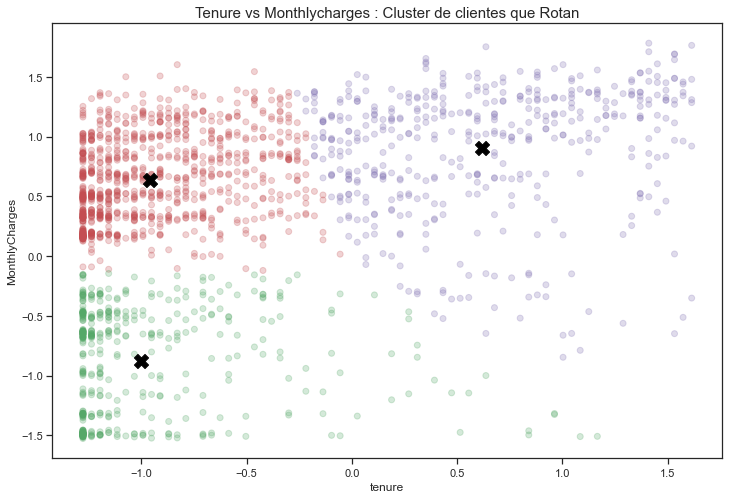

array([-1,  2,  1,  0], dtype=int64)

In [43]:
def Crea_Grafico_kmeans_cluster(df_mapeado, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = 1, #random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    #print(kmeans.labels_)
    colormap = {0: 'm', 1: 'r', 2: 'g', 3: 'b'}
    kmean_colors = [colormap[c] for c in kmeans.labels_]
    
    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=200 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_mapeado[df_mapeado.Churn_code==1][[x_title+'_norm', y_title +'_norm']])

df_mapeado['Cluster'] = -1 # by default set Cluster to -1
df_mapeado.loc[(df_mapeado.Churn_code==1),'Cluster'] = Crea_Grafico_kmeans_cluster(df_mapeado
                            ,df_mapeado[df_mapeado.Churn_code==1][['tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Cluster de clientes que Rotan")

df_mapeado['Cluster'].unique()

#Según los cargos mensuales y la tenencia, hay tres tipos de grupos. 
* Baja permanencia y cargos mensuales bajos (rojo) 
* Cargos mensuales bajos y altos (morado) 
* Alta tenencia y altos cargos mensuales (verde)

['m', 'r', 'g']


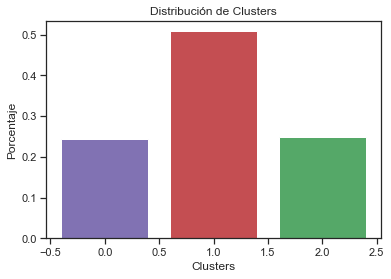

In [44]:
# Distribucion of clusters
churn_distribution =  df_mapeado[df_mapeado['Churn_code']==1].Cluster.value_counts(normalize=True).sort_index()
'''
Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución de Clusters')
                  #, color = plotColor)
'''    
colormap = {0: 'm', 1: 'r', 2: 'g', 3: 'b'}
kmean_colors = [colormap[c] for c in churn_distribution.index]

print(kmean_colors)
#print(colormap[int(churn_distribution.index)])

plt.bar(churn_distribution.index,churn_distribution.values, color=kmean_colors)
plt.title('Distribución de Clusters')
plt.xlabel('Clusters')
plt.ylabel('Porcentaje')
plt.show()


Alrededor del 50% de los clientes que se van pertenecen a baja permanencia y cargos mensuales altos. Profundizaremos en cada grupo, para ver si existen hallazgos interesantes.

In [45]:
df_clu = df_mapeado
# Se elimina porque estan normalizadas.
df_clu = df_clu.drop(columns=['Cluster','tenure','MonthlyCharges','TotalCharges']) ##,'tenure_norm','StreamingTV_code',
                              ##'StreamingMovies_code','DeviceProtection_code'])

In [46]:
#df_clu = df_clu.drop(columns=['MultipleLines_code'])
# No se elimina para ver el comportamiento final
# Todavia con lo visto en el mapa de correlación se pueden eliminar otras caracteristicas
df_clu = df_clu.drop(columns=['OnlineSecurity_code', 'OnlineBackup_code', 'TechSupport_code',
                              'DeviceProtection_code','InternetService_code','MultipleLines_code',
                              'StreamingMovies_code', 'StreamingTV_code', 'TotalCharges_norm'])
# No se elimina para ver el compotamiento al final

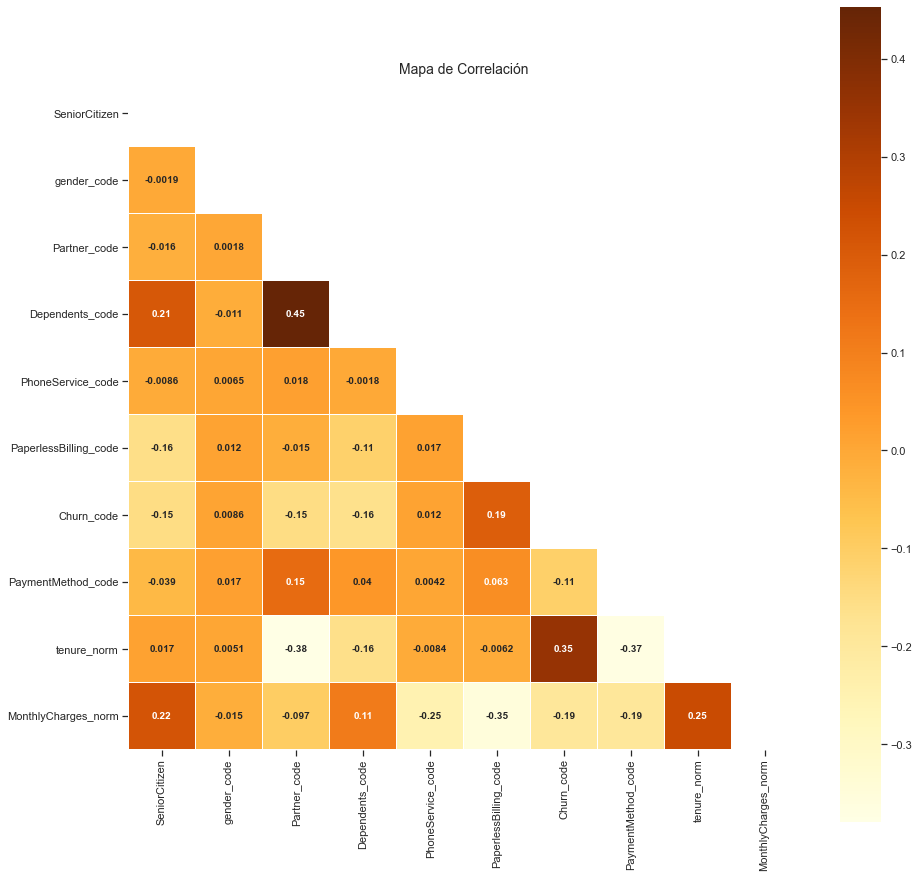

In [47]:
Generar_Mapa_Correlacion(df_clu.corr()
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

In [48]:
n=6
r=df_clu.corr()
t=r*np.sqrt((n-2)/(1-r*r))
p_features = set()  
arr_matrix = ss.t.cdf(t, n-2)
p_matrix = pd.DataFrame(arr_matrix)

In [49]:
for i in range(len(p_matrix.columns)):  
    for j in range(i):
        if abs(p_matrix.iloc[i, j]) <= 0.05:
            colname = p_matrix.columns[i]
            colname2 = p_matrix.columns[j]
            p_features.add(colname)
            p_features.add(colname2)

In [141]:
p_features

set()

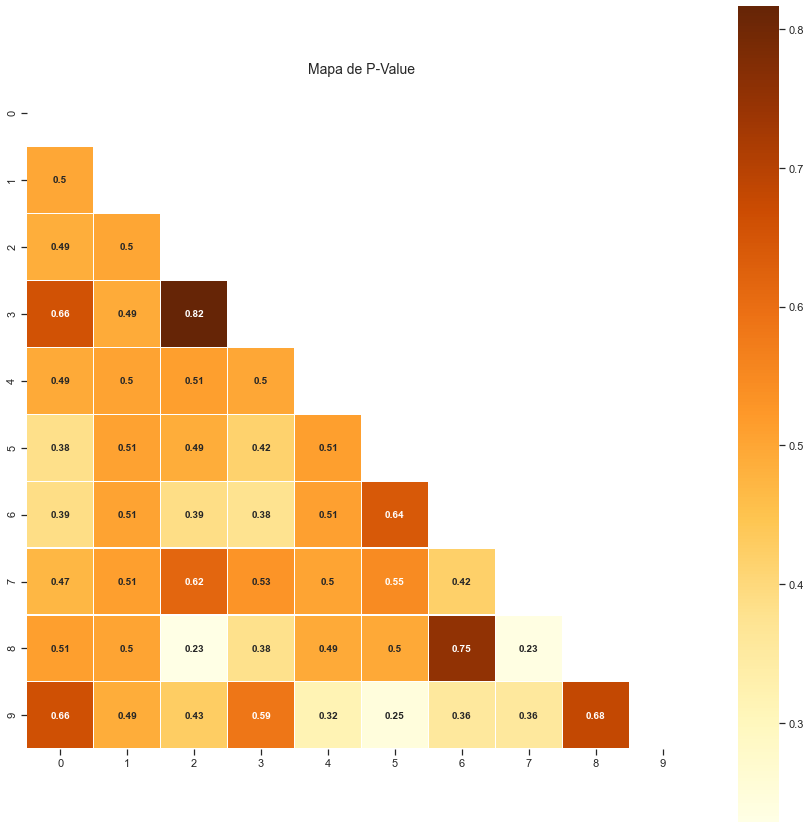

In [142]:
Generar_Mapa_Correlacion(p_matrix
                       ,chart_title = 'Mapa de P-Value'
                       ,mask_uppertri = True)

In [53]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
'''
bestSil = -1
for k in range(2,10):
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df_clu)
        sil = metrics.silhouette_score(df_clu, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
'''            

'\nbestSil = -1\nfor k in range(2,10):\n    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]\n    #clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]\n    for cl in clus:\n        res = cl.fit(df_clu)\n        sil = metrics.silhouette_score(df_clu, res.labels_)\n        print (str(cl)[:10] + \' with k =\' +str(k) + ": " + str(round(sil,4)))\n        if (sil > bestSil):\n            bestSil = sil\n            bestCl = cl\n'

In [145]:
bestCl

KMeans(n_clusters=2)

In [50]:
df_clu.columns

Index(['SeniorCitizen', 'gender_code', 'Partner_code', 'Dependents_code',
       'PhoneService_code', 'PaperlessBilling_code', 'Churn_code',
       'PaymentMethod_code', 'tenure_norm', 'MonthlyCharges_norm'],
      dtype='object')

In [51]:
df_norm = df_clu.copy()
df_norm = (df_norm - df_norm.mean()) / df_norm.std()

In [54]:
clu = KMeans(n_clusters=3,random_state=0)
clu.fit(df_norm)

KMeans(n_clusters=3, random_state=0)

In [55]:
df2 = df_clu.copy()
df2['cluster'] = clu.labels_
df2.groupby('cluster').mean().T

cluster,0,1,2
SeniorCitizen,0.001859,0.000000,1.000000
gender_code,1.501115,1.508706,1.502199
Partner_code,1.044610,1.917910,1.500440
Dependents_code,1.334572,1.927239,1.924362
PhoneService_code,1.089219,1.105410,1.090589
PaperlessBilling_code,1.472862,1.416045,1.230431
Churn_code,1.882900,1.664801,1.581354
PaymentMethod_code,2.330112,2.810323,2.484609
tenure_norm,0.528314,-0.453250,0.032089
MonthlyCharges_norm,-0.013700,-0.167928,0.507396


## Clasificación para predicción

### Regresión Logistica

In [56]:
X = df_clu.drop(columns=['Churn_code'])

In [57]:
Y = df_clu.Churn_code

In [61]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

In [62]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 6))
    sb.heatmap(conf_matrix/np.sum(conf_matrix), xticklabels=['No','Yes'],yticklabels=['No','Yes'], annot=True, fmt =".2%");
    #sb.heatmap(conf_matrix, xticklabels=['No','Yes'],yticklabels=['No','Yes'], annot=True, fmt ="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')
    plt.show()
    print (classification_report(y_test, pred_y))

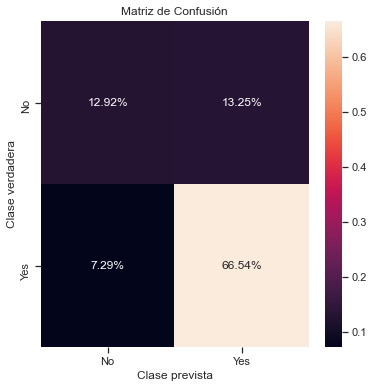

              precision    recall  f1-score   support

           1       0.64      0.49      0.56       553
           2       0.83      0.90      0.87      1560

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [63]:
import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
mostrar_resultados(y_test, y_pred)
#conf_matrix=confusion_matrix(y_test,y_pred)

## Random forest
### 1 - Más simple

In [66]:
# Trataremos de balancear el set de datos

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)
from imblearn.over_sampling import SMOTE
smt = SMOTE()

#print(X_train.size)
#print(y_train.size)
X_train_res1, y_train_res1 = smt.fit_resample(X_train, y_train) 
#print(X_train_res.size)
#print(y_train_res.size)
X_train = X_train_res1
y_train = y_train_res1
#print(X_train.size)
#print(y_train.size)
#X_train_res, Y_train_res = us.fit_sample(X_train, y_train)

#print ("Distribution before resampling {}".format((y_train.size)))
#print ("Distribution after resampling {}".format((Y_train_res.size)))

#creamos una función que crea el modelo que usaremos cada vez
#def run_model(X_train, X_test, y_train, y_test):
# clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-c10 g")
# clf_base.fit(X_train, y_train)
# return clf_base



In [67]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(random_state=2)
cl.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

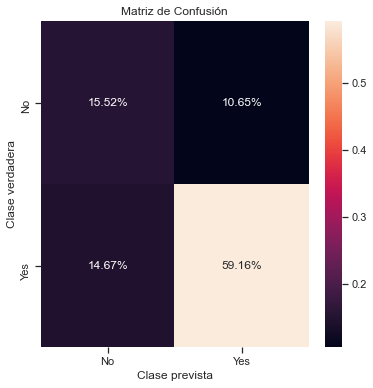

              precision    recall  f1-score   support

           1       0.51      0.59      0.55       553
           2       0.85      0.80      0.82      1560

    accuracy                           0.75      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.76      0.75      0.75      2113



In [68]:
y_pred = cl.predict(X_test)
mostrar_resultados(y_test, y_pred)

El modelo Random Forest presentó un Recall del 0.68. No obstante, tiene una tasa baja de falsos positivos(11.12%). En la práctica, significa 
* el 15.05% se predice correctamente que no abandonara.
* otro 15.38% se pedice incorrectamente que no abandonaran, aunque lo harán. 
* un 11.12% previstas como que se iran pero que no abandonara. 
* y un 58% de los clientes que abandonarán. 

In [69]:
y_proba = cl.predict_proba(X_test)[:,1]

In [70]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba)

0.7853340752074929

Tiene un metrica ROC_AUC buena, esto nos idica qué tan bien esta clasificando las predicciones



#### Predecir la churn rate de cada cliente según el modelo RandomForest

In [71]:
y_proba = cl.predict_proba(X_test)

### Cross-validation

In [72]:
cl

RandomForestClassifier(random_state=2)

In [73]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10,random_state=0,shuffle=True)
cross_val_score(cl,X,Y,cv=kf,scoring='roc_auc').mean()

0.7953436088539549

## Random forest
### 2 - más arboles

In [74]:
X = df_clu.drop(columns=['Churn_code'])

In [75]:
Y = df_clu.Churn_code

In [76]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,Y,
                            test_size=0.3,random_state = 0)
#print(X_train2.size)
#print(Y_train2.size)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_res2, y_train_res2 = smt.fit_resample(X_train2, y_train2) 
#print(X_train_res.size)
#print(y_train_res.size)
X_train2 = X_train_res2
y_train2 = y_train_res2

In [77]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators = 100, random_state=2)
cl.fit(X_train2,y_train2)

RandomForestClassifier(random_state=2)

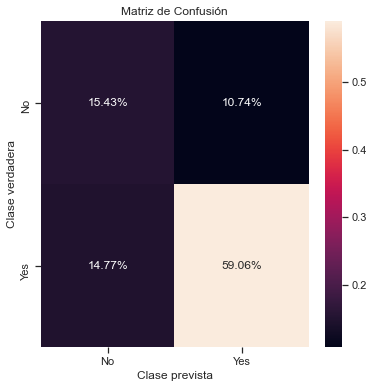

              precision    recall  f1-score   support

           1       0.51      0.59      0.55       553
           2       0.85      0.80      0.82      1560

    accuracy                           0.74      2113
   macro avg       0.68      0.69      0.68      2113
weighted avg       0.76      0.74      0.75      2113



In [78]:
y_pred = cl.predict(X_test2)
mostrar_resultados(y_test2, y_pred)

In [79]:
y_proba = cl.predict_proba(X_test2)[:,1]
roc_auc_score(y_test2,y_proba)

0.7828708211619604

In [80]:
y_proba = cl.predict_proba(X_test2)

In [81]:
# Cross validation
cl

RandomForestClassifier(random_state=2)

In [82]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
cross_val_score(cl,X,Y,cv=kf,scoring='roc_auc').mean()

0.7953436088539549

## Random forest
### 3 - Cambiando el valor default

In [83]:
X = df_clu.drop(columns=['Churn_code'])
Y = df_clu.Churn_code
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,Y,
                            test_size=0.3,random_state = 0)
#print(X_train3.size)
#print(Y_train3.size)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_res3, y_train_res3 = smt.fit_resample(X_train3, y_train3) 
#print(X_train_res.size)
#print(y_train_res.size)
X_train3 = X_train_res3
y_train3 = y_train_res3

In [84]:
from sklearn.ensemble import RandomForestClassifier
cl0 = RandomForestClassifier(n_estimators = 1000, random_state=2, min_samples_leaf = 35, max_features= 3)
cl0.fit(X_train3,y_train3)

RandomForestClassifier(max_features=3, min_samples_leaf=35, n_estimators=1000,
                       random_state=2)

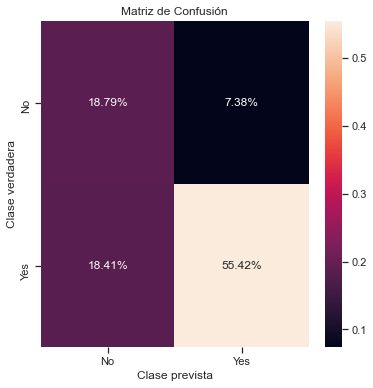

              precision    recall  f1-score   support

           1       0.51      0.72      0.59       553
           2       0.88      0.75      0.81      1560

    accuracy                           0.74      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.74      0.75      2113



In [85]:
y_pred = cl0.predict(X_test3)
mostrar_resultados(y_test3, y_pred)

In [86]:
y_proba = cl.predict_proba(X_test3)[:,1]
roc_auc_score(y_test3,y_proba)

0.7828708211619604

In [87]:
#### Predict the churn rate for each customer based on the RandomFrorest Model
y_proba = cl0.predict_proba(X_test3)

In [88]:
#Cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
cross_val_score(cl0,X,Y,cv=kf,scoring='roc_auc').mean()

0.8313223120395831

In [95]:
cl.feature_importances_.size

9

In [96]:
X.columns.size

9

In [97]:
coef_dict={}

for name, importance in zip(X.columns.values, cl.feature_importances_):
    print(name, "=", importance)

SeniorCitizen = 0.020501494953894295
gender_code = 0.02951920032154465
Partner_code = 0.025940560161241247
Dependents_code = 0.023763646108909294
PhoneService_code = 0.010770042531561679
PaperlessBilling_code = 0.04136966013665518
PaymentMethod_code = 0.08957202560711054
tenure_norm = 0.38979251544106663
MonthlyCharges_norm = 0.36877085473801646


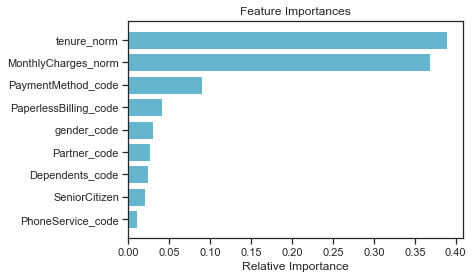

In [98]:
features = X.columns.values
importances = cl.feature_importances_
indices = np.argsort(importances)

#plt.size()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:>

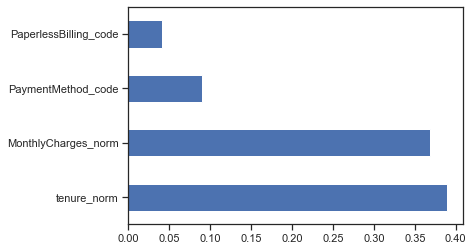

In [99]:
feat_importances = pd.Series(cl.feature_importances_, index=X.columns.values)
feat_importances.nlargest(4).plot(kind='barh')

AxesSubplot(0.125,0.125;0.775x0.755)


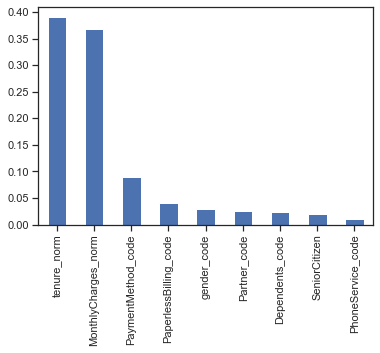

In [100]:
weights = pd.Series(cl.feature_importances_,
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [101]:
X = df_clu.loc[:, df_clu.columns != 'Churn_code'].values
y = df_clu['Churn_code'].values  

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [102]:
###############################################################################

# ANN Build

###############################################################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Funcion para crear una NN para clasificacion binaria usando 2 HL
    
    """
    
    
    # Initialising the ANN
    model = Sequential()
    
    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features, 
                    kernel_initializer = 'normal', 
                    activation = 'relu')) 
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in, 
                    kernel_initializer = 'normal', 
                    activation = 'relu'))
    
    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out, 
                    kernel_initializer = 'normal', 
                    activation = 'sigmoid')) 
    
    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model


In [103]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)


# Parametros
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/100
53/53 [==============================] - 1s 844us/step - loss: 0.6681 - accuracy: 0.2435
Epoch 2/100
53/53 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.2654
Epoch 3/100
53/53 [==============================] - 0s 805us/step - loss: -0.3693 - accuracy: 0.2610
Epoch 4/100
53/53 [==============================] - 0s 959us/step - loss: -2.1753 - accuracy: 0.2725
Epoch 5/100
53/53 [==============================] - 0s 825us/step - loss: -5.4092 - accuracy: 0.2656
Epoch 6/100
53/53 [==============================] - 0s 805us/step - loss: -11.0437 - accuracy: 0.2640
Epoch 7/100
53/53 [==============================] - 0s 767us/step - loss: -19.9012 - accuracy: 0.2683
Epoch 8/100
53/53 [==============================] - 0s 767us/step - loss: -32.6525 - accuracy: 0.2714
Epoch 9/100
53/53 [==============================] - 0s 825us/step - loss: -49.5511 - accuracy: 0.2736
Epoch 10/100
53/53 [==============================] - 0s 863us/step - loss: -73.95

53/53 [==============================] - 0s 748us/step - loss: -28324.0343 - accuracy: 0.2717
Epoch 79/100
53/53 [==============================] - 0s 748us/step - loss: -29468.7030 - accuracy: 0.2627
Epoch 80/100
53/53 [==============================] - 0s 748us/step - loss: -30847.4859 - accuracy: 0.2697
Epoch 81/100
53/53 [==============================] - 0s 710us/step - loss: -31914.5575 - accuracy: 0.2647
Epoch 82/100
53/53 [==============================] - 0s 729us/step - loss: -32926.6505 - accuracy: 0.2597
Epoch 83/100
53/53 [==============================] - 0s 710us/step - loss: -34800.1489 - accuracy: 0.2564
Epoch 84/100
53/53 [==============================] - 0s 710us/step - loss: -35251.3337 - accuracy: 0.2553
Epoch 85/100
53/53 [==============================] - 0s 710us/step - loss: -35450.6528 - accuracy: 0.2605
Epoch 86/100
53/53 [==============================] - 0s 729us/step - loss: -36794.5221 - accuracy: 0.2645
Epoch 87/100
53/53 [==============================

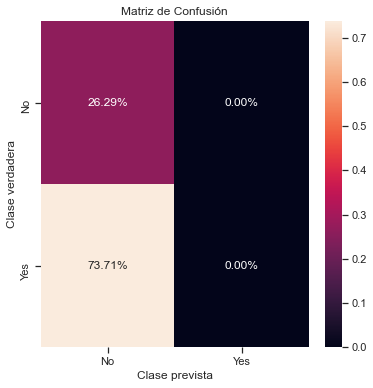

              precision    recall  f1-score   support

           1       0.26      1.00      0.42       463
           2       0.00      0.00      0.00      1298

    accuracy                           0.26      1761
   macro avg       0.13      0.50      0.21      1761
weighted avg       0.07      0.26      0.11      1761



In [104]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
mostrar_resultados(y_test, y_pred)
# Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

#### Basado en los resultado obtenido con base en la variables utilizadas los resultados del modelo generado no son muy alentadores.

La ANN presentó un Recall del 0.50. No obstante, tiene una tasa baja de falsos positivos(11.12%). En la práctica, significa

el 26.29% se predice correctamente que no abandonara.
otro 73.71% se pedice incorrectamente que no abandonaran, aunque lo harán.
un 0% previstas como que se iran pero que no abandonara.
y un 0% de los clientes que abandonarán.

### ANN con todas las variables

In [105]:
df_copia = df;

In [106]:
ElementosABorrar = ['customerID','gender_code', 'Partner_code', 'Dependents_code', 'PhoneService_code', \
       'MultipleLines_code', 'InternetService_code', 'OnlineSecurity_code', \
       'OnlineBackup_code', 'DeviceProtection_code', 'TechSupport_code', \
       'StreamingTV_code', 'StreamingMovies_code', 'Contract_code', \
       'PaperlessBilling_code', 'Churn_code', 'PaymentMethod_code']
df_copia.drop(ElementosABorrar, axis = 1, inplace=True)

In [107]:
# Borrar Luego
variables_categoricas=['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling','PaymentMethod']
variables_numericas = ['tenure','MonthlyCharges', 'TotalCharges']

In [108]:
info_categorica = variables_categoricas
info_numerica = variables_numericas
variables_categoricas.remove('SeniorCitizen')
variables_numericas.append('SeniorCitizen')

In [109]:
df_copia.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in info_categorica:
    df_copia.loc[:,cols] = LabelEncoder().fit_transform(df_copia.loc[:,cols])
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
onehotencoder = OneHotEncoder(sparse=False)
# Se convierte en un arreglo 
data_categorica = onehotencoder.fit_transform(df_copia[info_categorica])
# Hay que escalarlas variables numericas
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
# Se convierte en un arreglo 
data_numerica=standard_scaler.fit_transform(df_copia[info_numerica])

In [111]:
variables=np.concatenate([data_categorica,data_numerica],axis=1)
destino=df_copia.iloc[:,19:].values
destino=label_encoder.fit_transform(destino)

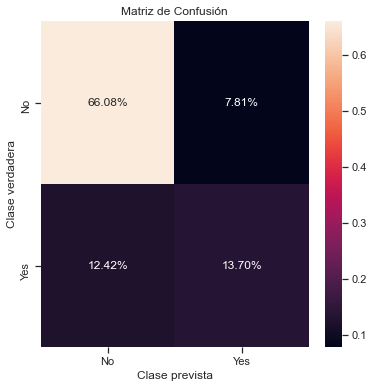

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [112]:
import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(variables, destino, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
mostrar_resultados(y_test, y_pred)
#conf_matrix=confusion_matrix(y_test,y_pred)

El modelo de regresión logistica presentó un Recall del 0.71. 

el 66.08% se predice correctamente que no abandonara.
otro 12.42% se pedice incorrectamente que no abandonaran, aunque lo harán.
un 7.81% previstas como que se iran pero que no abandonara.
y un 13.70% de los clientes que abandonarán.

In [114]:
# Parametros
n_features = np.shape(X_train)[1]
w_in = 6
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/100
57/57 [==============================] - 1s 837us/step - loss: 0.6867 - accuracy: 0.7220
Epoch 2/100
57/57 [==============================] - 0s 819us/step - loss: 0.6132 - accuracy: 0.7252
Epoch 3/100
57/57 [==============================] - 0s 856us/step - loss: 0.4810 - accuracy: 0.7295
Epoch 4/100
57/57 [==============================] - 0s 837us/step - loss: 0.4389 - accuracy: 0.7551
Epoch 5/100
57/57 [==============================] - 0s 873us/step - loss: 0.4398 - accuracy: 0.7951
Epoch 6/100
57/57 [==============================] - 0s 837us/step - loss: 0.4242 - accuracy: 0.7983
Epoch 7/100
57/57 [==============================] - 0s 873us/step - loss: 0.4121 - accuracy: 0.8079
Epoch 8/100
57/57 [==============================] - 0s 890us/step - loss: 0.4253 - accuracy: 0.8000
Epoch 9/100
57/57 [==============================] - 0s 855us/step - loss: 0.4106 - accuracy: 0.8084
Epoch 10/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy

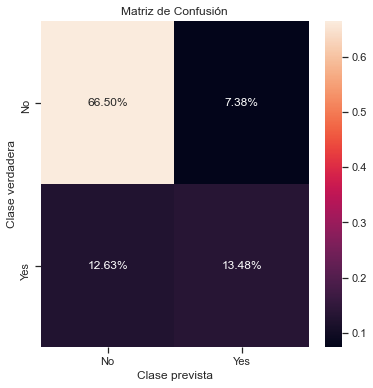

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [115]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
mostrar_resultados(y_test, y_pred)

# Con todas las variables el modelo mejora notoriamente.

La ANN presentó un Recall del 0.68. 

* el 67.57% se predice correctamente que no abandonara.
* otro 14.48% se pedice incorrectamente que no abandonaran, aunque lo harán.
* un 6.32% previstas como que se iran pero que no abandonara.
* y un 11.64% de los clientes que abandonarán.